<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
# import piplite
# await piplite.install(['numpy'],['pandas'])
# await piplite.install(['seaborn'])

In [20]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Task 3: Load in the Dataset in your Jupyter Notebook

#### Read the dataset in the csv file from the URL


In [4]:
# from js import fetch
# import io

# URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
# resp = await fetch(URL)
# boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Become familiar with the dataset

The following describes the dataset variables:

· CRIM - per capita crime rate by town

· ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

· INDUS - proportion of non-retail business acres per town.

· CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

· NOX - nitric oxides concentration (parts per 10 million)

· RM - average number of rooms per dwelling

· AGE - proportion of owner-occupied units built prior to 1940

· DIS - weighted distances to five Boston employment centres

· RAD - index of accessibility to radial highways

· TAX - full-value property-tax rate per $10,000

· PTRATIO - pupil-teacher ratio by town

· LSTAT - % lower status of the population

· MEDV - Median value of owner-occupied homes in $1000's

In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [9]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Task 4: Generate Descriptive Statistics and Visualizations

## 4.1: For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'Median value of owner-occupied homes')

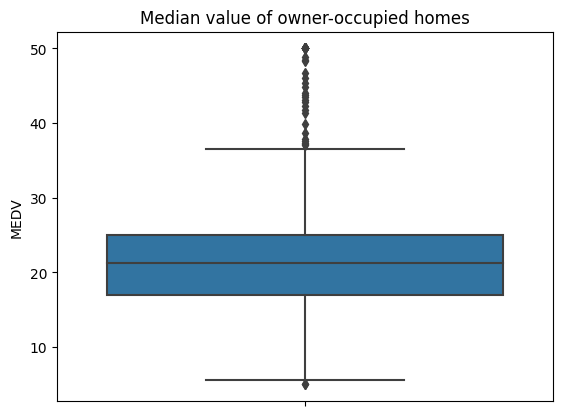

In [19]:
box_plot = sns.boxplot(y=boston_df["MEDV"])
box_plot.set_title("Median value of owner-occupied homes")

## 4.2: Provide a bar plot for the Charles River variable

c:\Users\joaol\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


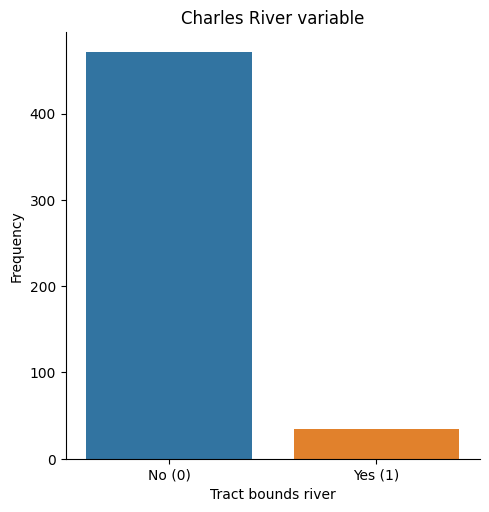

In [40]:
sns.catplot(x="CHAS", kind="count", data=boston_df)
plt.xlabel("Tract bounds river")
plt.ylabel("Frequency")
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
plt.title("Charles River variable")
plt.show()

## 4.3: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

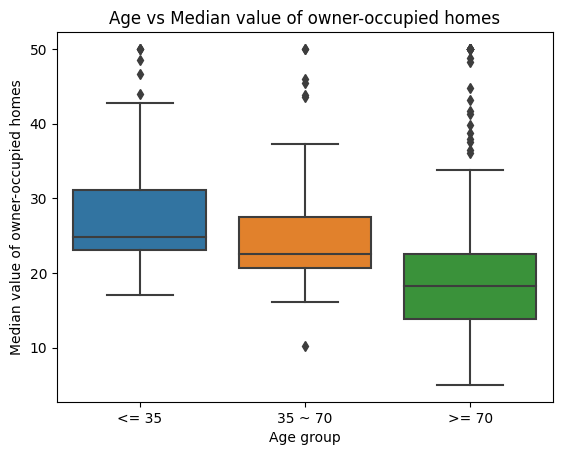

In [34]:
boston_df['age_group'] = pd.cut(boston_df.AGE, [0, 35, 70, 100], labels=["35 years and younger", "between 35 and 70 years", "70 years and older"])
sns.boxplot(x="age_group", y="MEDV", data=boston_df)
plt.xlabel("Age group")
plt.ylabel("Median value of owner-occupied homes")
plt.title("Age vs Median value of owner-occupied homes")
plt.xticks([0, 1, 2], ['<= 35', '35 ~ 70', '>= 70'])
plt.show()

## 4.4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

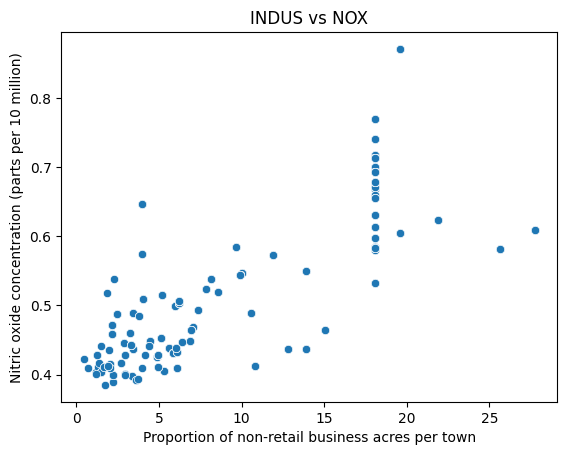

In [39]:
sns.scatterplot(x="INDUS", y="NOX", data=boston_df)
plt.xlabel("Proportion of non-retail business acres per town")
plt.ylabel("Nitric oxide concentration (parts per 10 million)")
plt.title("INDUS vs NOX")
plt.show()

The relationship between these two variables appears to have a positive trend.

## 4.5: Create a histogram for the pupil to teacher ratio variable

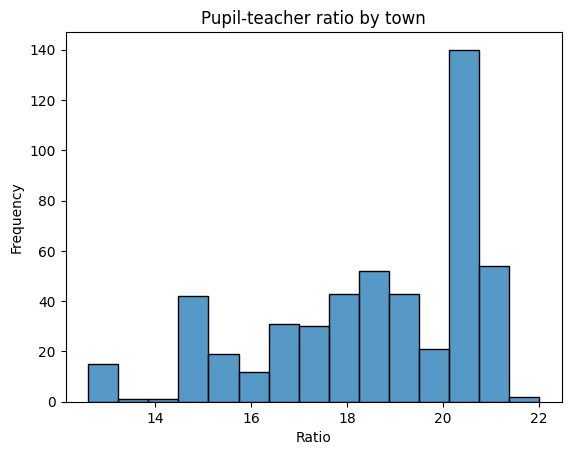

In [46]:
# Create a histogram for the pupil to teacher ratio variable
sns.histplot(boston_df["PTRATIO"], bins=15)
plt.xlabel("Ratio")
plt.ylabel("Frequency")
plt.title("Pupil-teacher ratio by town")
plt.show()

# Task 5: Use the appropriate tests to answer the questions provided

# 5.1: Is there a significant difference in median value of houses bounded by the Charles River or not? (T-test for independent samples)

Consider:

* $\mu_1$: the population mean of median values of houses bounded by the Charles River (CHAS = 1).

* $\mu_2$: the population mean of median values of houses not bounded by the Charles River (CHAS = 0).

* $\alpha=0.05$: the significance level

_Hypothesis_

* $H_0$: **There is no** significant difference in the median value of houses between those bounded by the Charles River and those not bounded by the river.

$$H_0:\mu_1=\mu_2$$

* $H_1$: **There is** a significant difference in the median value of houses between those bounded by the Charles River and those not bounded by the river.

$$H_1:\mu_1\neq\mu_2$$

In [67]:
t_test = scipy.stats.ttest_ind(boston_df[boston_df.CHAS == 1]['MEDV'], boston_df[boston_df.CHAS == 0]['MEDV'])
print("t = %g  p = %g" % (t_test[0], t_test[1]))


t = 3.99644  p = 7.39062e-05


_Conclusion_

The resulting p-value was lower than the chosen significance level ($\alpha = 0.05$). Therefore, we reject the null hypothesis $\left(H_0\right)$ and conclude that there is a significant difference in the median values ​​between the two groups $\left(H_1\right)$.

In other words, there is a significant difference in the average value of homes bordered by the Charles River.

# 5.2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Consider:

* $\mu_1,\mu_2,\mu_3,\dots,\mu_k$: the population means of MEDV for each group defined by different proportions of owner-occupied units built prior to 1940 (AGE).

* $\alpha=0.05$: the significance level

_Hypothesis_

* $H_0$: **There is no** significant difference in median values of houses (MEDV) among the different groups based on the proportion of owner-occupied units built prior to 1940 (AGE).

$$H_0:\mu_1=\mu_2=\mu_3=\ldots=\mu_k$$

* $H_1$: **There is** a significant difference in median values of houses (MEDV) among the different groups based on the proportion of owner-occupied units built prior to 1940 (AGE).

$$H_1:\text{At least one }\mu_i \text{ is different from the others}$$

In [64]:
model = ols('MEDV ~ C(AGE)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print('p-value:', anova_table['PR(>F)'][0])

anova_table

p-value: 0.5539698276810212


,sum_sq,df,F,PR(>F)
C(AGE),29884.038419,355.0,0.984009,0.55397
Residual,12832.256996,150.0,NaN,NaN


_Conclusion_

Given that the p-value obtained is greater than the chosen significance ($\alpha=0.05$), we do not have sufficient statistical evidence to reject the null hypothesis $\left(H_0\right)$.

This means there is no statistical evidence to conclude that there is a significant difference in median home values ​​(MEDV) between different groups defined by the proportions of owner-occupied units built before 1940 (AGE).

## 5.3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Consider:

* $\rho$: the population correlation coefficient between NOX and INDUS.

* $\alpha=0.05$: the significance level

_Hypothesis_

* $H_0$: **There is no** significant linear relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

$$H_0:\rho=0$$

* $H_1$: **There is** a significant linear relationship (either positive or negative) between nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

$$H_1:\rho\neq 0$$

In [63]:
pearsonr = scipy.stats.pearsonr(boston_df.INDUS, boston_df.NOX)

print('Pearson correlation coefficient:', pearsonr[0])
print('p-value:', pearsonr[1])

Pearson correlation coefficient: 0.7636514469209157
p-value: 7.91336106123623e-98


_Conclusion_

Given the obtained Pearson correlation coefficient, 0.76, and the obtained p-value of approximately zero much smaller than the chosen degree of significance ($\alpha=0.05$), we conclude, with a high degree of statistical confidence, there is strong evidence that There is a significant positive linear relationship between nitric oxide (NOX) concentrations and the proportion of non-commercial business acres per city (INDUS). Therefore, we reject the null hypothesis $\left(H_0\right)$ that there is no significant relationship and conclude that there is a significant positive relationship between these two variables.

In other words, as the proportion of non-commercial business acres (INDUS) increases, nitric oxide (NOX) concentrations also tend to increase linearly.

## 5.4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Consider:

* $\beta_1$: the population coefficient for the independent variable DIS (i.e., the effect of an additional weighted distance to employment centers on MEDV).

* $\alpha=0.05$: the significance level

_Hypothesis_

* $H_0$: **There is no** significant linear relationship between the weighted distance to the Boston employment centers (DIS) and the median value of owner-occupied homes (MEDV).

$$H_0:\beta_1=0$$

* $H_1$: **There is** a significant linear relationship between the weighted distance to the Boston employment centers (DIS) and the median value of owner-occupied homes (MEDV).

$$H_1:\beta_1\neq 0$$

In [60]:
model = ols('MEDV ~ DIS', data=boston_df).fit()

print('p-value:', model.f_pvalue)
print('r-squared:', model.rsquared)

model.summary()

p-value: 1.2066117273372497e-08
r-squared: 0.062464372121782574


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 16 Sep 2023   Prob (F-statistic):           1.21e-08
Time:                        15:04:58   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

_Conclusion_

The very low p-value (1.2066117273372497e-08) indicates that there is a statistically significant relationship between the independent variable DIS (weighted distance to Boston employment centers) and the dependent variable MEDV (median value of owner-occupied homes). Therefore, we reject the null hypothesis that there is no significant relationship.

However, the low R-squared value (0.062464372121782574) suggests that the DIS variable explains only a small part of the observed variability in MEDV. This means that although there is a statistically significant relationship, the DIS variable by itself is not a very strong predictor in explaining variations in median home values. Other factors not included in the model may be playing an important role in determining these values.